# features of selected samples

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent cumputeAnaTree!
Error in <TMacOSXSystem::Load>: version mismatch, /Users/erezcohen/larlite/lib/libAnalysisTreesInformation_CCQEPackage.so = 60410, ROOT = 60602
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libAnalysisTreesInformation_CCQEPackage.so for calcEventTopologies


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/'
figures_size = (8,4)
figures_fontsize = 15
markers_size = 6

In [3]:
def sample_in_FV(sample=None, max_FV_y = 110,
                 min_FV_z = 5, max_FV_z = 1045,
                 min_FV_x = 3, max_FV_x = 250):
    sample_in_FV = sample[ 
                              (np.abs(sample['starty_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['starty_assigned_proton']) < max_FV_y)
                            & (np.abs(sample['endy_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['endy_assigned_proton']) < max_FV_y)
                            
                            & ((sample['startz_assigned_muon'] > min_FV_z) & (sample['startz_assigned_muon'] < max_FV_z) )
                            & ((sample['startz_assigned_proton'] > min_FV_z) & (sample['startz_assigned_proton'] < max_FV_z) )                            
                            & ((sample['endz_assigned_muon'] > min_FV_z) & (sample['endz_assigned_muon'] < max_FV_z) )
                            & ((sample['endz_assigned_proton'] > min_FV_z) & (sample['endz_assigned_proton'] < max_FV_z) )

                            & ((sample['startx_assigned_muon'] > min_FV_x) & (sample['startx_assigned_muon'] < max_FV_x) )
                            & ((sample['startx_assigned_proton'] > min_FV_x) & (sample['startx_assigned_proton'] < max_FV_x) )                            
                            & ((sample['endx_assigned_muon'] > min_FV_x) & (sample['endx_assigned_muon'] < max_FV_x) )
                            & ((sample['endx_assigned_proton'] > min_FV_x) & (sample['endx_assigned_proton'] < max_FV_x) )
                           ]
    return sample_in_FV

In [124]:
def plot_truthEv_vs_recoEv(sample=None,figsuffix='',do_add_diagonal_line=False,
                           plottype='scatter',cmap='hot_r',gridsize=50):
    fig,ax=plt.subplots(figsize=figures_size)
    if plottype is 'scatter':
        sample.plot.scatter('truth_Ev','reco_CC1p_Ev',ax=ax);
    elif plottype is 'hexbin' or plottype is 'hist':
        hb=ax.hexbin(sample['truth_Ev'],sample['reco_CC1p_Ev'],gridsize=gridsize,cmap=cmap);
        cb=fig.colorbar(hb, ax=ax)
        cb.ax.tick_params(labelsize=25)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()

    set_axes(ax,x_label='truth $E_{\\nu}$ [GeV]',y_label='reco. $E_{\\nu}$ [GeV]')
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.grid(linestyle='--',alpha=0.75)
    if do_add_diagonal_line:
        plt.plot([0.25,1.75],[0.25,1.75],'--',color='black')
    plt.tight_layout()
    filename=figures_path+'truthEv_vs_recoEv_'+figsuffix+'.pdf'
    fig.savefig(filename)
    print 'saved '+filename

In [5]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'total CC1p',(100*float(len(GENIECC1p))/len(GENIECC1p)),'%'
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'contained',(100*float(len(GENIECC1pIsVertexContained))/len(GENIECC1p)),'%'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'tracks reconstructed',(100*float(len(GENIECC1pIsVertexReconstructed))/len(GENIECC1p)),'%'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
print len(GENIECC1p_in_FV),'tracks reconstructed and contained',(100*float(len(GENIECC1p_in_FV))/len(GENIECC1p)),'%'
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(GENIECC1p)),'%'

12976 total CC1p 100.0 %
5299 contained 40.8369297164 %
1151 tracks reconstructed 8.87022194821 %
904 tracks reconstructed and contained 6.96670776819 %
745 tracks reconstructed and contained with a separation distance below 11 cm 5.74136868064 %


In [6]:
MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')
MCBNBextBNB_in_FV = sample_in_FV(MCBNBextBNB)
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'
print len(MCBNBextBNB_in_FV),'2-tracks clusters from MC-BNB events + extBNB in FV'

MCBNBextBNB = MCBNBextBNB_in_FV
MCBNBextBNB['PIDa_ratio_smaller_larger'] = MCBNBextBNB['PIDA_small_pida']/MCBNBextBNB['PIDA_large_pida']
MCBNBextBNB['length_ratio_short_long'] = MCBNBextBNB['l_short']/MCBNBextBNB['l_long']
MCBNBextBNB['reco_CC1p_alpha_q'] = (MCBNBextBNB['reco_CC1p_omega'] - MCBNBextBNB['reco_CC1p_q_z'])/0.931
MCBNBextBNB['reco_CC1p_theta_mu'] = np.arccos(MCBNBextBNB['reco_CC1p_Pmu_z']/MCBNBextBNB['reco_CC1p_Pmu'])
MCBNBextBNB['reco_CC1p_Emu'] = np.sqrt(0.106*0.106+MCBNBextBNB['reco_CC1p_Pmu']*MCBNBextBNB['reco_CC1p_Pmu'])
MCBNBextBNB['reco_CC1p_Mott'] = MCBNBextBNB['reco_CC1p_Ev']*MCBNBextBNB['reco_CC1p_Emu']*np.power(np.cos(0.5*MCBNBextBNB['reco_CC1p_theta_mu']),2)/np.power(np.sin(0.5*MCBNBextBNB['reco_CC1p_theta_mu']),4)
MCBNBextBNB['reco_CC1p_Q2_4EEsintheta/2'] = 4.0*MCBNBextBNB['reco_CC1p_Ev']*MCBNBextBNB['reco_CC1p_Emu']*np.power(np.sin(0.5*MCBNBextBNB['reco_CC1p_theta_mu']),2)


print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'

TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==True]
print len(TrueCC1p), 'are true (GENIE) cc1p, ',float(100*float(len(TrueCC1p))/len(MCBNBextBNB)),'%'

CC1pDetected = MCBNBextBNB[(MCBNBextBNB.GENIECC1p==False) & (MCBNBextBNB.Is1mu1p==True)]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p',float(100*float(len(CC1pDetected))/len(MCBNBextBNB)),'%'

NonCC1p = MCBNBextBNB[(MCBNBextBNB.GENIECC1p==False) & (MCBNBextBNB.Is1mu1p==False) & (MCBNBextBNB.pdg_long!=-9999) & (MCBNBextBNB.pdg_short!=-9999) ]
print len(NonCC1p), 'are 2-tracks not 1µ1p',float(100*float(len(NonCC1p))/len(MCBNBextBNB)),'%'

extPairs = MCBNBextBNB[(MCBNBextBNB.GENIECC1p==False) & (MCBNBextBNB.Is1mu1p==False) & ((MCBNBextBNB.pdg_long==-9999) | (MCBNBextBNB.pdg_short==-9999)) ]
print len(extPairs), 'are 2-tracks with unrecognized pdg code (extBNB)',float(100*float(len(extPairs))/len(MCBNBextBNB)),'%'

print len(TrueCC1p) + len(CC1pDetected) + len(NonCC1p) + len(extPairs)

samples = [TrueCC1p , CC1pDetected, NonCC1p , extPairs]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' , 'unrecognized' ]
cmaps = ['Blues' , 'Greens', 'Reds' , 'Purples']
colors = ['blue' , 'green', 'red' , 'purple']

39881 2-tracks clusters from MC-BNB events + extBNB
25827 2-tracks clusters from MC-BNB events + extBNB in FV
25827 2-tracks clusters from MC-BNB events + extBNB
819 are true (GENIE) cc1p,  3.17110001162 %
2424 are 2-tracks clusters of 1µ1p 9.38552677431 %
3208 are 2-tracks not 1µ1p 12.4211096914 %
19376 are 2-tracks with unrecognized pdg code (extBNB) 75.0222635227 %
25827


## sample of 93% purity and 18% efficiency

In [90]:
def sample_in_selected_cut( data=None, label='' ,do_print=False

                           ,max_distance=30 # [cm]
                           ,max_FV_y = 130 # [cm]
                           ,max_theta_pq = 360 # [deg.]
                           ,max_reco_CC1p_Pt = 100

                           ,delta_Delta_phi = 360 # around 180 [deg.]
                           ,delta_reco_CC1p_p_over_q = 100 # around 1.365 
                           ,delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff = 100 # around 0.711
                           ,delta_PIDa_ratio_smaller_larger = 100 # around 0.467

                           ,min_ratio_associated_hit_charge_to_total_u = -10
                           ,min_ratio_associated_hit_charge_to_total_v = -10
                           ,min_ratio_associated_hit_charge_to_total_y = -10 
                          ):

    data_in_FV = sample_in_FV(sample=data,max_FV_y=max_FV_y)
    reduced = data_in_FV[     
        (data_in_FV['distance'] < max_distance)
        
        & (np.abs(data_in_FV['delta_phi'] - 180) < delta_Delta_phi)
        
        & (data_in_FV['reco_CC1p_omega'] > 0)
        & (data_in_FV['reco_CC1p_omega'] < data_in_FV['reco_CC1p_q'])

#         & (np.abs(180./np.pi*data['2_tracks_angle'] - 90) < delta_2_tracks_angle )
        & (data_in_FV['reco_CC1p_theta_pq'] < max_theta_pq )                
        & (np.abs(data_in_FV['reco_CC1p_p_over_q'] - 1.365) < delta_reco_CC1p_p_over_q )
        & (np.abs(data_in_FV['PIDa_ratio_smaller_larger'] - 0.467) < delta_PIDa_ratio_smaller_larger )
        & (data_in_FV['reco_CC1p_Pt'] < max_reco_CC1p_Pt)
        & (np.abs(data_in_FV['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] - 0.711) < delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff )
#         & (np.abs(data_in_FV['reco_CC1p_W2'] - 0.89) < delta_reco_CC1p_W2 )
                
        & ((data_in_FV['reco_CC1p_y'] > 0.9*data_in_FV['reco_CC1p_s']-1.4) | (data_in_FV['reco_CC1p_y']<0.266))
        & (data_in_FV['ratio_associated_hit_charge_to_total_u'] > min_ratio_associated_hit_charge_to_total_u)
        & (data_in_FV['ratio_associated_hit_charge_to_total_v'] > min_ratio_associated_hit_charge_to_total_v)
        & (data_in_FV['ratio_associated_hit_charge_to_total_y'] > min_ratio_associated_hit_charge_to_total_y)
    ]    
    
    frac = 100 * float(len(reduced)) / len(data) 
    frac_err = frac * np.sqrt( 1./len(reduced) + 1./len(data) ) if len(reduced)>0 else frac / np.sqrt(len(data))
    if do_print: print label,"retained %.1f +/- %.1f"%(frac,frac_err)+ "% in this cut (",len(reduced),")"
    return reduced , frac , frac_err

reduced,frac,frac_err = [], [] , []
for sample,label in zip(samples,labels):
    r,f,f_err = sample_in_selected_cut( data=sample, label=label, do_print=True
                                       ,max_distance=5. # [cm]
                                       ,max_FV_y = 100 # [cm]
                                       ,max_theta_pq = 5 # 40 # [deg.]
                                       ,delta_Delta_phi = 35 # around 180 [deg.]
                                       ,delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff = 1.1 # around 0.711
                                       ,delta_PIDa_ratio_smaller_larger = 0.35 # around 0.467
                                       ,min_ratio_associated_hit_charge_to_total_u = 0.2
                                       ,min_ratio_associated_hit_charge_to_total_v = 0.
                                       ,min_ratio_associated_hit_charge_to_total_y = 0.4 
                                      )
    reduced.append(r)
    frac.append(f)
    frac_err.append(f_err)

print 'efficiency: %.1f +/-%.1f'%(frac[0],frac_err[0]),'%'
purity = 100.*(float(len(reduced[0]))/(len(reduced[0])+len(reduced[1])+len(reduced[2])+len(reduced[3])))
print 'purity: %.1f'%purity,'%'

true CC1p retained 6.3 +/- 0.9% in this cut ( 52 )
1$\mu$1p non CC1p retained 0.0 +/- 0.0% in this cut ( 0 )
non 1$\mu$1p retained 0.0 +/- 0.0% in this cut ( 0 )
unrecognized retained 0.0 +/- 0.0% in this cut ( 0 )
efficiency: 6.3 +/-0.9 %
purity: 100.0 %


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/truthEv_vs_recoEv_sample1.pdf


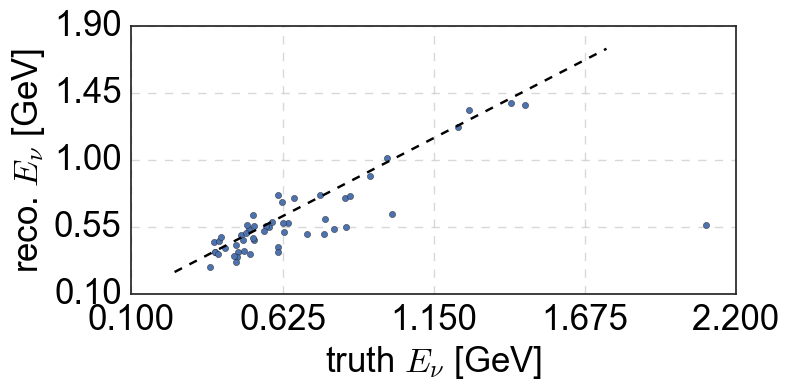

In [91]:
plot_truthEv_vs_recoEv(sample=reduced[0],figsuffix='sample1',do_add_diagonal_line=True)

## a sample of 93% purity and 18% efficiency

In [171]:
def sample_in_selected_cut( data=None, label='' , do_print=False,
                           max_FV_y = 110,
                           
                           do_reasonable_reconstructed_parameters = False,

                           do_omega_q_correlation_cut = False,
                           do_Q2_W2_correlation_cut = False,
                           do_alpha_pt_correlation_cut = False,
                           
                           do_reco_CC1p_Q2_from_angles_ratio=False,
                           min_reco_CC1p_Q2_from_angles_ratio=0.,
                           
                           do_Delta_phi_cut=False,
                           delta_Delta_phi=360,
                           
                           do_Delta_2_tracks_angle_cut=False,
                           delta_2_tracks_angle=360,
                                                      
                           do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_cut=False,
                           min_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio=0,
                           do_Ev_diff_muangles_mupangles_cut=False,
                           
                           do_distance_cut=False,
                           max_distance=100,
                           
                           do_l_short_cut=False,
                           min_l_short=0,
                           
                           do_PIDa_muon_proton_correlation_cut=False,
                           do_PIDa_ratio_smaller_larger_cut=False,
                           min_PIDa_ratio_smaller_larger=0.,
                           max_PIDa_ratio_smaller_larger=10.,

                           
                           
                           do_ratio_associated_hit_charge_to_total_cut=False,
                           min_ratio_associated_hit_charge_to_total_u=-1,
                           min_ratio_associated_hit_charge_to_total_v=-1,
                           min_ratio_associated_hit_charge_to_total_y=-1,

                           do_ratio_associated_hit_charge_to_total_u_theta_pq_correlation_cut=False,



                           do_p_over_q_cut=False,
                           max_p_over_q=100,
                           
                           
                           do_cut_theta_pq = False,
                           max_theta_pq = 180,

                           do_cut_Pt = False, 
                           max_Pt=100,
                           
                           do_W2MinMax_cut = False,
                           min_W2=-1,max_W2=100,
                           
                           do_W2_Pt_correlation_cut=False,

                           do_alpha_miss_max_cut=False,
                           max_alpha_miss=10,
                           
                           do_Q2_diff_ratio_cut=False,
                           
                           do_alpha_miss_Xb_cut=False,

                           do_cut_cosmic_score=False,
                           max_cosmicscore_large_pida=1.5,
                           max_coscontscore_large_pida=1.5,
                           
                           do_theta_pq_Q2_diff_correlation_cut=False,
                           do_alpha_mu_alpha_miss_correlation_cut=False,
                           do_p_over_q_PIDa_ratio_correlation_cut=False,
                           do_Q2_from_angles_diff_y_correlation_cut=False,
                           do_PIDA_assigned_muon_PIDa_ratio_smaller_larger_cut=False,
                           do_distance_delta_phi_correlation_cut=False,
                           do_theta_pq_momrange_mommsllhd_assigned_muon_correlation_cut=False,
                           do_average_ratio_associated_hit_charge_to_total_PIDA_assigned_muon_cut=False,
                           do_PIDa_ratio_smaller_larger_ratio_associated_hit_charge_to_total_y_cut=False,
                           do_delta_phi_reco_CC1p_omega_correlation_cut=False,
                           do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_y_cut=False,
                           do_ratio_momrange_mommsllhd_assigned_proton_cut=False,
                           max_ratio_momrange_mommsllhd_assigned_proton=100,
                           
                           
                           do_distance_delta_phi_cut=False,
                           do_delta_phi_W2_cut=False,
                           do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_theta_pq_cut=False
                          ):

    reduced = sample_in_FV(sample=data,max_FV_y=max_FV_y)

    if do_distance_cut:
        reduced = reduced[reduced['distance'] < max_distance]
    
    if do_reasonable_reconstructed_parameters:
        reduced = reduced[(reduced['reco_CC1p_Q2']>0)&(reduced['reco_CC1p_Q2']<2)
                          &(reduced['reco_CC1p_W2']>0) &(reduced['reco_CC1p_W2']<2.5)
                          &(reduced['reco_CC1p_omega']>0.05)&(reduced['reco_CC1p_omega']<2)
                          &(reduced['reco_CC1p_Pt']<2)
                          &(reduced['reco_CC1p_Xb']>0)&(reduced['reco_CC1p_Xb']<2)
                          &(reduced['ratio_associated_hit_charge_to_total_u']<1)
                          &(reduced['ratio_associated_hit_charge_to_total_v']<1)
                          &(reduced['ratio_associated_hit_charge_to_total_y']<1)
                          &(reduced['reco_CC1p_s']<4.1)
                         ]



    # correlations    
    if do_alpha_pt_correlation_cut:
        reduced = reduced[(0.9 < reduced['reco_CC1p_alpha_miss'])                
                          & (reduced['reco_CC1p_Pt'] < 1.5 - reduced['reco_CC1p_alpha_miss'])
                         ]
        
    
    
    # \omega vs. q
    if do_omega_q_correlation_cut:
        reduced = reduced[        
            (reduced['reco_CC1p_omega'] > 0)
            & (reduced['reco_CC1p_omega'] < reduced['reco_CC1p_q'])           
        ]
  
    # Q2 vs. W2
    if do_Q2_W2_correlation_cut:
        reduced = reduced[
            (1 - 2.5*reduced['reco_CC1p_Q2'] < reduced['reco_CC1p_W2'])    
            & (reduced['reco_CC1p_W2'] < 2.2 - 2.5*reduced['reco_CC1p_Q2'])
        ]
    
    if do_reco_CC1p_Q2_from_angles_ratio:
        reduced = reduced[reduced['reco_CC1p_Q2_from_angles_ratio'] > min_reco_CC1p_Q2_from_angles_ratio]
        
    if do_Delta_phi_cut:
        reduced = reduced[np.abs(reduced['delta_phi'] - 180 ) < delta_Delta_phi]

    if do_Delta_2_tracks_angle_cut:
        reduced = reduced[np.abs(180./np.pi*reduced['2_tracks_angle'] - 90 ) < delta_2_tracks_angle]
    
    if do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_cut:
        reduced = reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio'] > min_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio]
        reduced = reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio'] < 6]
    if do_Ev_diff_muangles_mupangles_cut:
        # my own graphical cut
        reduced=reduced[
            ((reduced['reco_CC1p_Ev_with_binding_diff']>-0.6) & (reduced['reco_CC1p_Ev_with_binding_diff']<-0.1)
             & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > (-1.6)*reduced['reco_CC1p_Ev_with_binding_diff']+(-1.1))                     
             & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > -0.3) 
             & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < 4)
            )
            |((reduced['reco_CC1p_Ev_with_binding_diff']>-0.1) & (reduced['reco_CC1p_Ev_with_binding_diff']<0.4)
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > (2.0)*reduced['reco_CC1p_Ev_with_binding_diff']+(-0.7))
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < (-1.8)*reduced['reco_CC1p_Ev_with_binding_diff']+(0.8))
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > -0.3)                         
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < 4)
             )
            |((reduced['reco_CC1p_Ev_with_binding_diff']>-0.6) & (reduced['reco_CC1p_Ev_with_binding_diff']<0.0)
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > -0.1)
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < 4)
              )
        ]

        
    if do_l_short_cut:
        reduced = reduced[reduced['l_short'] > min_l_short]
    
    if do_PIDa_muon_proton_correlation_cut:
        reduced = reduced[(reduced['PIDA_assigned_muon']>5)
                          & (reduced['PIDA_assigned_proton'] < 20)
                          & (reduced['PIDA_assigned_proton'] > 1.625*reduced['PIDA_assigned_muon'] - 1.125)]
        
    if do_PIDa_ratio_smaller_larger_cut:
        reduced = reduced[(reduced['PIDa_ratio_smaller_larger']>min_PIDa_ratio_smaller_larger) 
                          & (reduced['PIDa_ratio_smaller_larger']<max_PIDa_ratio_smaller_larger)]
                          
    if do_p_over_q_cut:
        reduced = reduced[reduced['reco_CC1p_p_over_q']<max_p_over_q]
    
    if do_cut_theta_pq:
        reduced = reduced[reduced['reco_CC1p_theta_pq'] < max_theta_pq ]
    
    if do_cut_Pt:
        reduced = reduced[reduced['reco_CC1p_Pt'] < max_Pt ]
        
    if do_ratio_associated_hit_charge_to_total_cut:
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_u'] > min_ratio_associated_hit_charge_to_total_u]
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_v'] > min_ratio_associated_hit_charge_to_total_v]
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_y'] > min_ratio_associated_hit_charge_to_total_y]

    if do_W2MinMax_cut:        
        reduced = reduced[(reduced['reco_CC1p_W2'] < max_W2)&(reduced['reco_CC1p_W2']>min_W2)]
    
    if do_W2_Pt_correlation_cut:
        reduced = reduced[(reduced['reco_CC1p_Pt'] < -0.4*reduced['reco_CC1p_W2']+0.4)]
    
    if do_alpha_miss_max_cut:
        reduced = reduced[(reduced['reco_CC1p_alpha_miss'] < max_alpha_miss)]
    
    if do_Q2_diff_ratio_cut:
        reduced = reduced[((reduced['reco_CC1p_Q2_from_angles_diff']<0.171*reduced['reco_CC1p_Q2_from_angles_ratio']+(-0.170))
                          |(reduced['reco_CC1p_Q2_from_angles_diff']>0.171*reduced['reco_CC1p_Q2_from_angles_ratio']+(-0.173)))
                          & (reduced['reco_CC1p_Q2_from_angles_diff'] > -0.002)
                          & (reduced['reco_CC1p_Q2_from_angles_diff'] < 0.004)
                         ]
    
    if do_alpha_miss_Xb_cut:
        reduced = reduced[(reduced['reco_CC1p_Xb'] < 5.43*reduced['reco_CC1p_alpha_miss']+(-4.08))
                          & (reduced['reco_CC1p_Xb'] > 7.067*reduced['reco_CC1p_alpha_miss']+(-6.713))
                         ]

        
    if do_cut_cosmic_score:
        reduced = reduced[(reduced['cosmicscore_large_pida'] < max_cosmicscore_large_pida)
                          &(reduced['coscontscore_large_pida'] < max_coscontscore_large_pida)]
    
    if do_ratio_associated_hit_charge_to_total_u_theta_pq_correlation_cut:
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_u']>0.029*reduced['reco_CC1p_theta_pq']+(-0.014)]
    
    if do_theta_pq_Q2_diff_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_Q2_from_angles_diff']<(0.0030)+(0.0002)*np.square(reduced['reco_CC1p_theta_pq']-18.5)]
    
    if do_alpha_mu_alpha_miss_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_alpha_mu'] < 2.61*reduced['reco_CC1p_alpha_miss']+(-1.91)]

    if do_p_over_q_PIDa_ratio_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_p_over_q']<10.00*reduced['PIDa_ratio_smaller_larger']+(-1.55)]
    
    if do_Q2_from_angles_diff_y_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_Q2_from_angles_diff']>0.411*reduced['reco_CC1p_y']+(-0.250)]
    
    if do_PIDA_assigned_muon_PIDa_ratio_smaller_larger_cut:
        reduced=reduced[(reduced['PIDA_assigned_muon']<62.500*reduced['PIDa_ratio_smaller_larger']+(-9.625))&(reduced['PIDA_assigned_muon']>-62.500*reduced['PIDa_ratio_smaller_larger']+(21.625))]
        reduced=reduced[reduced['PIDA_assigned_muon']>69.231*reduced['PIDa_ratio_smaller_larger']+(-41.615)]
    
    if do_distance_delta_phi_correlation_cut:
        reduced=reduced[reduced['distance']<0.346*reduced['delta_phi']+(-56.994)]
    
    if do_theta_pq_momrange_mommsllhd_assigned_muon_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_theta_pq']<(14.0000)+(90.0000)*np.square(reduced['ratio_momrange_mommsllhd_assigned_muon']-0.950)]
    
    if do_average_ratio_associated_hit_charge_to_total_PIDA_assigned_muon_cut:
        reduced=reduced[reduced['average_ratio_associated_hit_charge_to_total']>0.175*reduced['PIDA_assigned_muon']+(-1.125)]
    
    if do_PIDa_ratio_smaller_larger_ratio_associated_hit_charge_to_total_y_cut:
        reduced=reduced[reduced['ratio_associated_hit_charge_to_total_y']>1.000*reduced['PIDa_ratio_smaller_larger']+(-0.300)]
        
    if do_delta_phi_reco_CC1p_omega_correlation_cut:
        reduced=reduced[reduced['delta_phi']>150.000*reduced['reco_CC1p_omega']+(114.750)]
    
    if do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_y_cut:
        reduced=reduced[reduced['reco_CC1p_y']<(0.4900)+(2.0000)*np.square(reduced['ratio_momrange_mommsllhd_assigned_muon']-0.250)]
    
    if do_ratio_momrange_mommsllhd_assigned_proton_cut:
        reduced=reduced[reduced['ratio_momrange_mommsllhd_assigned_proton']<max_ratio_momrange_mommsllhd_assigned_proton]
    
    if do_distance_delta_phi_cut:
        reduced=reduced[reduced['distance'] < -0.20*reduced['delta_phi']+(41.00)]
    
    if do_delta_phi_W2_cut:
        reduced=reduced[reduced['reco_CC1p_W2'] > -0.12*reduced['delta_phi']+(21.00)]
    
    if do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_theta_pq_cut:
        reduced=reduced[reduced['ratio_momrange_mommsllhd_assigned_muon'] < 0.0667*reduced['reco_CC1p_theta_pq']+(1.0000)]
    
    frac = 100 * float(len(reduced)) / len(data) 
    frac_err = frac * np.sqrt( 1./len(reduced) + 1./len(data) ) if len(reduced)>0 else frac / np.sqrt(len(data))
    if do_print: print label,"retained %.1f +/- %.1f"%(frac,frac_err)+ "% in this cut (",len(reduced),")"
    return reduced , frac , frac_err

In [175]:
reduced,frac,frac_err = [], [] , []
for sample,label in zip(samples,labels):
    r,f,f_err = sample_in_selected_cut( data=sample, label=label, do_print=True,
                                       do_reasonable_reconstructed_parameters=True,
                                       
                                       min_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio=0.2,
                                       do_Delta_phi_cut = True,
                                       delta_Delta_phi = 10,
                                       
                                       do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_cut=True,
                                       do_Ev_diff_muangles_mupangles_cut=True,
                                       
                                       do_distance_cut=True,
                                       max_distance=5, # [cm]                                       
                                       
                                       do_PIDa_ratio_smaller_larger_cut=True,
                                       min_PIDa_ratio_smaller_larger=0.25,
                                       max_PIDa_ratio_smaller_larger=0.7,


                                       do_ratio_associated_hit_charge_to_total_cut= True,
                                       min_ratio_associated_hit_charge_to_total_u = 0.,
                                       min_ratio_associated_hit_charge_to_total_v = 0.,
                                       min_ratio_associated_hit_charge_to_total_y = 0.,                                       
                                       
                                       do_cut_theta_pq=True,
                                       max_theta_pq=45.,
                                       
                                       do_cut_Pt=True,
                                       max_Pt=0.3,
                                       
                                       do_W2MinMax_cut=True,
                                       max_W2=1.3,
                                                                              
                                       do_alpha_miss_max_cut=True,
                                       max_alpha_miss=1.3,
                                       
                                       do_cut_cosmic_score=True,
                                       max_cosmicscore_large_pida=0.01,
                                       max_coscontscore_large_pida=0.01,

                                       do_ratio_associated_hit_charge_to_total_u_theta_pq_correlation_cut=True,                                  
                                       do_theta_pq_Q2_diff_correlation_cut=True,
                                       do_alpha_mu_alpha_miss_correlation_cut=True,
                                       do_p_over_q_PIDa_ratio_correlation_cut=True,
                                       do_Q2_from_angles_diff_y_correlation_cut=True,
                                       do_PIDA_assigned_muon_PIDa_ratio_smaller_larger_cut=True,
                                       do_distance_delta_phi_correlation_cut=True,
                                       do_theta_pq_momrange_mommsllhd_assigned_muon_correlation_cut=True,
                                       do_average_ratio_associated_hit_charge_to_total_PIDA_assigned_muon_cut=True,
                                       do_PIDa_ratio_smaller_larger_ratio_associated_hit_charge_to_total_y_cut=True,
                                       do_delta_phi_reco_CC1p_omega_correlation_cut=True,
                                       do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_y_cut=True,
                                       
                               
                                       do_ratio_momrange_mommsllhd_assigned_proton_cut=True,
                                       max_ratio_momrange_mommsllhd_assigned_proton=0.8,
                                       
                                       do_distance_delta_phi_cut=True,
                                       do_delta_phi_W2_cut=True,
                                       do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_theta_pq_cut=True
                                                                              
                                      )
    reduced.append(r)
    frac.append(f)
    frac_err.append(f_err)

print 'efficiency: %.1f +/-%.1f'%(frac[0],frac_err[0]),'%'
purity = 100.*(float(len(reduced[0]))/(len(reduced[0])+len(reduced[1])+len(reduced[2])+len(reduced[3])))
print 'purity: %.1f'%purity,'%'
print 'pur. x eff.: %.1f'%(frac[0]*purity)

true CC1p retained 22.0 +/- 1.8% in this cut ( 180 )
1$\mu$1p non CC1p retained 0.6 +/- 0.2% in this cut ( 15 )
non 1$\mu$1p retained 0.0 +/- 0.0% in this cut ( 0 )
unrecognized retained 0.0 +/- 0.0% in this cut ( 0 )
efficiency: 22.0 +/-1.8 %
purity: 92.3 %
pur. x eff.: 2028.7


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/truthEv_vs_recoEv_sample2.pdf


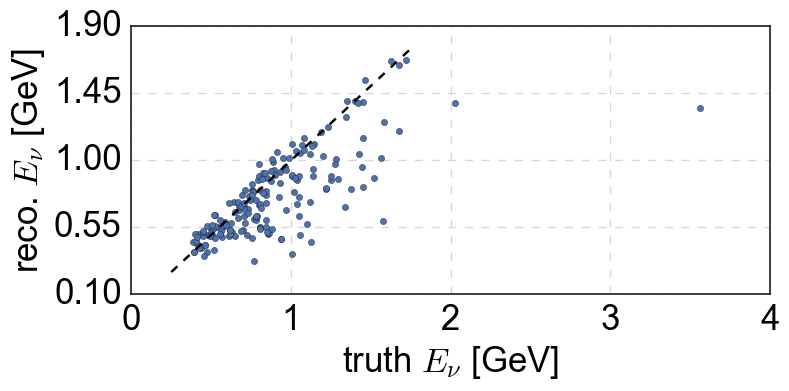

In [94]:
plot_truthEv_vs_recoEv(sample=reduced[0],figsuffix='sample2',do_add_diagonal_line=True)

## sample of 71% purity and 50% efficiency

In [178]:
def sample_in_selected_cut( data=None, label='' , do_print=False,
                           max_FV_y = 110,
                           
                           do_reasonable_reconstructed_parameters = False,

                           do_omega_q_correlation_cut = False,
                           do_Q2_W2_correlation_cut = False,
                           do_alpha_pt_correlation_cut = False,
                           
                           do_reco_CC1p_Q2_from_angles_ratio=False,
                           min_reco_CC1p_Q2_from_angles_ratio=0.,
                           
                           do_Delta_phi_cut=False,
                           delta_Delta_phi=360,
                           
                           do_Delta_2_tracks_angle_cut=False,
                           delta_2_tracks_angle=360,
                                                      
                           do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_cut=False,
                           min_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio=0,
                           do_Ev_diff_muangles_mupangles_cut=False,
                           
                           do_distance_cut=False,
                           max_distance=100,
                           
                           do_l_short_cut=False,
                           min_l_short=0,
                           
                           do_PIDa_muon_proton_correlation_cut=False,
                           do_PIDa_ratio_smaller_larger_cut=False,
                           min_PIDa_ratio_smaller_larger=0.,
                           max_PIDa_ratio_smaller_larger=10.,

                           
                           
                           do_ratio_associated_hit_charge_to_total_cut=False,
                           min_ratio_associated_hit_charge_to_total_u=-1,
                           min_ratio_associated_hit_charge_to_total_v=-1,
                           min_ratio_associated_hit_charge_to_total_y=-1,

                           do_ratio_associated_hit_charge_to_total_u_theta_pq_correlation_cut=False,

                           do_p_over_q_cut=False,
                           max_p_over_q=100,
                           
                           do_cut_theta_pq = False,
                           max_theta_pq = 180,

                           do_cut_Pt = False, 
                           max_Pt=100,
                           
                           do_W2MinMax_cut = False,
                           min_W2=-1,max_W2=100,
                           
                           do_W2_Pt_correlation_cut=False,

                           do_alpha_miss_max_cut=False,
                           max_alpha_miss=10,
                           do_alpha_miss_min_cut=False,
                           min_alpha_miss=0,
                           
                           do_Q2_diff_ratio_cut=False,
                           
                           do_alpha_miss_Xb_cut=False,

                           do_cut_cosmic_score=False,
                           max_cosmicscore_large_pida=1.5,
                           max_coscontscore_large_pida=1.5,
                           
                           do_theta_pq_Q2_diff_correlation_cut=False,
                           do_alpha_mu_alpha_miss_correlation_cut=False,
                           do_p_over_q_PIDa_ratio_correlation_cut=False,
                           do_Q2_from_angles_diff_y_correlation_cut=False,
                           do_PIDA_assigned_muon_PIDa_ratio_smaller_larger_cut=False,
                           do_distance_delta_phi_correlation_cut=False,
                           do_theta_pq_momrange_mommsllhd_assigned_muon_correlation_cut=False,
                           do_average_ratio_associated_hit_charge_to_total_PIDA_assigned_muon_cut=False,
                           do_PIDa_ratio_smaller_larger_ratio_associated_hit_charge_to_total_y_cut=False,
                           do_delta_phi_reco_CC1p_omega_correlation_cut=False,
                           do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_y_cut=False,
                           do_alpha_miss_Pt_cut=False,
                           # theta(pq)correlation cuts
                           do_theta_pq_p_over_q_correlation_cut=False,
                           do_theta_pq_delta_phi_correlation_cut=False,
                           do_ratio_associated_hit_charge_to_total_y_PIDa_ratio_smaller_larger_cut=False,
                           do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_delta_phi_cut=False,
                           do_PIDA_assigned_muon_alpha_miss_cut=False,
                           do_ratio_momrange_mommsllhd_assigned_proton_delta_phi_cut=False,
                           do_ratio_associated_hit_charge_to_total_u_reco_CC1p_s_cut=False,
                           do_reco_CC1p_omega_delta_phi_cut=False,
                           do_ratio_associated_hit_charge_to_total_u_reco_CC1p_theta_pq_cut=False,
                           do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff_reco_CC1p_alpha_p_cut=False,
                           do_PIDA_assigned_muon_delta_phi_cut=False,
                           do_reco_CC1p_Q2_from_angles_ratio_reco_CC1p_Pt_cut=False
                          ):

    reduced = sample_in_FV(sample=data,max_FV_y=max_FV_y)

    if do_distance_cut:
        reduced = reduced[reduced['distance'] < max_distance]
    
    if do_reasonable_reconstructed_parameters:
        reduced = reduced[(reduced['reco_CC1p_Q2']>0)&(reduced['reco_CC1p_Q2']<2)
                          &(reduced['reco_CC1p_W2']>0) &(reduced['reco_CC1p_W2']<2.5)
                          &(reduced['reco_CC1p_omega']>0.05)&(reduced['reco_CC1p_omega']<2)
                          &(reduced['reco_CC1p_Pt']<2)
                          &(reduced['reco_CC1p_Xb']>0)&(reduced['reco_CC1p_Xb']<2)
                          &(reduced['ratio_associated_hit_charge_to_total_u']<1)
                          &(reduced['ratio_associated_hit_charge_to_total_v']<1)
                          &(reduced['ratio_associated_hit_charge_to_total_y']<1)
                          &(reduced['reco_CC1p_s']>0)&(reduced['reco_CC1p_s']<4.15) 
#                           &((reduced['mommsllhd_assigned_muon']!=-1)
#                             | (reduced['mommsllhd_assigned_muon']!=-1.0 )
#                             | ((reduced['mommsllhd_assigned_proton']!=-1.0) & (reduced['mommsllhd_assigned_muon']!=-1.0)))
                         ]



    # correlations    
    if do_alpha_pt_correlation_cut:
        reduced = reduced[(0.9 < reduced['reco_CC1p_alpha_miss'])                
                          & (reduced['reco_CC1p_Pt'] < 1.5 - reduced['reco_CC1p_alpha_miss'])
                         ]
        
    
    
    # \omega vs. q
    if do_omega_q_correlation_cut:
        reduced = reduced[        
            (reduced['reco_CC1p_omega'] > 0)
            & (reduced['reco_CC1p_omega'] < reduced['reco_CC1p_q'])           
        ]
  
    # Q2 vs. W2
    if do_Q2_W2_correlation_cut:
        reduced = reduced[
            (1 - 2.5*reduced['reco_CC1p_Q2'] < reduced['reco_CC1p_W2'])    
            & (reduced['reco_CC1p_W2'] < 2.2 - 2.5*reduced['reco_CC1p_Q2'])
        ]
    
    if do_reco_CC1p_Q2_from_angles_ratio:
        reduced = reduced[reduced['reco_CC1p_Q2_from_angles_ratio'] > min_reco_CC1p_Q2_from_angles_ratio]
        
    if do_Delta_phi_cut:
        reduced = reduced[np.abs(reduced['delta_phi'] - 180 ) < delta_Delta_phi]

    if do_Delta_2_tracks_angle_cut:
        reduced = reduced[np.abs(180./np.pi*reduced['2_tracks_angle'] - 90 ) < delta_2_tracks_angle]
    
    if do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_cut:
        reduced = reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio'] > min_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio]
        reduced = reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio'] < 6]
    if do_Ev_diff_muangles_mupangles_cut:
        # my own graphical cut
        reduced=reduced[
            ((reduced['reco_CC1p_Ev_with_binding_diff']>-0.6) & (reduced['reco_CC1p_Ev_with_binding_diff']<-0.1)
             & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > (-1.6)*reduced['reco_CC1p_Ev_with_binding_diff']+(-1.1))                     
             & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > -0.3) 
             & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < 4)
            )
            |((reduced['reco_CC1p_Ev_with_binding_diff']>-0.1) & (reduced['reco_CC1p_Ev_with_binding_diff']<0.4)
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > (2.0)*reduced['reco_CC1p_Ev_with_binding_diff']+(-0.7))
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < (-1.8)*reduced['reco_CC1p_Ev_with_binding_diff']+(0.8))
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > -0.3)                         
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < 4)
             )
            |((reduced['reco_CC1p_Ev_with_binding_diff']>-0.6) & (reduced['reco_CC1p_Ev_with_binding_diff']<0.0)
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] > -0.1)
              & (reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] < 4)
              )
        ]

        
    if do_l_short_cut:
        reduced = reduced[reduced['l_short'] > min_l_short]
    
    if do_PIDa_muon_proton_correlation_cut:
        reduced = reduced[(reduced['PIDA_assigned_muon']>5)
                          & (reduced['PIDA_assigned_proton'] < 20)
                          & (reduced['PIDA_assigned_proton'] > 1.625*reduced['PIDA_assigned_muon'] - 1.125)]
        
    if do_PIDa_ratio_smaller_larger_cut:
        reduced = reduced[(reduced['PIDa_ratio_smaller_larger']>min_PIDa_ratio_smaller_larger) 
                          & (reduced['PIDa_ratio_smaller_larger']<max_PIDa_ratio_smaller_larger)]
                          
    if do_p_over_q_cut:
        reduced = reduced[reduced['reco_CC1p_p_over_q']<max_p_over_q]
    
    if do_cut_theta_pq:
        reduced = reduced[reduced['reco_CC1p_theta_pq'] < max_theta_pq ]
    
    if do_cut_Pt:
        reduced = reduced[reduced['reco_CC1p_Pt'] < max_Pt ]
        
    if do_ratio_associated_hit_charge_to_total_cut:
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_u'] > min_ratio_associated_hit_charge_to_total_u]
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_v'] > min_ratio_associated_hit_charge_to_total_v]
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_y'] > min_ratio_associated_hit_charge_to_total_y]

    if do_W2MinMax_cut:        
        reduced = reduced[(reduced['reco_CC1p_W2'] < max_W2)&(reduced['reco_CC1p_W2']>min_W2)]
    
    if do_W2_Pt_correlation_cut:
        reduced = reduced[(reduced['reco_CC1p_Pt'] < -0.4*reduced['reco_CC1p_W2']+0.4)]
    
    if do_alpha_miss_max_cut:
        reduced = reduced[(reduced['reco_CC1p_alpha_miss'] < max_alpha_miss)]
    if do_alpha_miss_min_cut:
        reduced = reduced[(reduced['reco_CC1p_alpha_miss'] > min_alpha_miss)]
    
    if do_Q2_diff_ratio_cut:
        reduced = reduced[((reduced['reco_CC1p_Q2_from_angles_diff']<0.171*reduced['reco_CC1p_Q2_from_angles_ratio']+(-0.170))
                          |(reduced['reco_CC1p_Q2_from_angles_diff']>0.171*reduced['reco_CC1p_Q2_from_angles_ratio']+(-0.173)))
                          & (reduced['reco_CC1p_Q2_from_angles_diff'] > -0.002)
                          & (reduced['reco_CC1p_Q2_from_angles_diff'] < 0.004)
                         ]
    
    if do_alpha_miss_Xb_cut:
        reduced = reduced[reduced['reco_CC1p_Xb'] > 6.000*reduced['reco_CC1p_alpha_miss']+(-5.760)]
        
    if do_cut_cosmic_score:
        reduced = reduced[(reduced['cosmicscore_large_pida'] < max_cosmicscore_large_pida)
                          &(reduced['coscontscore_large_pida'] < max_coscontscore_large_pida)]
    
    if do_ratio_associated_hit_charge_to_total_u_theta_pq_correlation_cut:
        reduced = reduced[reduced['ratio_associated_hit_charge_to_total_u']>0.029*reduced['reco_CC1p_theta_pq']+(-0.014)]
    
    if do_theta_pq_Q2_diff_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_Q2_from_angles_diff']<(0.0030)+(0.0002)*np.square(reduced['reco_CC1p_theta_pq']-18.5)]
    
    if do_alpha_mu_alpha_miss_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_alpha_mu']<7.00*reduced['reco_CC1p_alpha_miss']+(-6.55)]
    
    if do_p_over_q_PIDa_ratio_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_p_over_q']<10.00*reduced['PIDa_ratio_smaller_larger']+(-1.55)]
    
    if do_Q2_from_angles_diff_y_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_Q2_from_angles_diff']>0.411*reduced['reco_CC1p_y']+(-0.250)]
    
    if do_PIDA_assigned_muon_PIDa_ratio_smaller_larger_cut:
        reduced=reduced[(reduced['PIDA_assigned_muon']<62.500*reduced['PIDa_ratio_smaller_larger']+(-9.625))&(reduced['PIDA_assigned_muon']>-62.500*reduced['PIDa_ratio_smaller_larger']+(21.625))]
        reduced=reduced[reduced['PIDA_assigned_muon']>69.231*reduced['PIDa_ratio_smaller_larger']+(-41.615)]
    
    if do_distance_delta_phi_correlation_cut:
        reduced=reduced[reduced['distance']<0.346*reduced['delta_phi']+(-56.994)]
    
    if do_theta_pq_momrange_mommsllhd_assigned_muon_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_theta_pq']<(14.0000)+(90.0000)*np.square(reduced['ratio_momrange_mommsllhd_assigned_muon']-0.950)]
    
    if do_average_ratio_associated_hit_charge_to_total_PIDA_assigned_muon_cut:
        reduced=reduced[reduced['average_ratio_associated_hit_charge_to_total']>0.175*reduced['PIDA_assigned_muon']+(-1.125)]
    
    if do_PIDa_ratio_smaller_larger_ratio_associated_hit_charge_to_total_y_cut:
        reduced=reduced[reduced['ratio_associated_hit_charge_to_total_y']>1.000*reduced['PIDa_ratio_smaller_larger']+(-0.300)]
        
    if do_delta_phi_reco_CC1p_omega_correlation_cut:
        reduced=reduced[reduced['delta_phi']>150.000*reduced['reco_CC1p_omega']+(114.750)]
    
    if do_ratio_momrange_mommsllhd_assigned_muon_reco_CC1p_y_cut:
        reduced=reduced[reduced['reco_CC1p_y']<(0.4900)+(2.0000)*np.square(reduced['ratio_momrange_mommsllhd_assigned_muon']-0.250)]
        
    if do_alpha_miss_Pt_cut:
        reduced=reduced[reduced['reco_CC1p_Pt']>-2.500*reduced['reco_CC1p_alpha_miss']+(1.875)]
        reduced=reduced[reduced['reco_CC1p_Pt']<(0.4500)+(-2.0000)*np.square(reduced['reco_CC1p_alpha_miss']-0.800)]
    
    if do_theta_pq_p_over_q_correlation_cut:
        reduced=reduced[reduced['reco_CC1p_p_over_q']<0.038*reduced['reco_CC1p_theta_pq']+(1.100)]
        reduced=reduced[reduced['reco_CC1p_p_over_q']>0.021*reduced['reco_CC1p_theta_pq']+(0.591)]
        
    if do_theta_pq_delta_phi_correlation_cut:
        reduced=reduced[reduced['delta_phi']>0.429*reduced['reco_CC1p_theta_pq']+(148.786)]
        reduced=reduced[reduced['delta_phi']<0.800*reduced['reco_CC1p_theta_pq']+(191.000)]

    if do_ratio_associated_hit_charge_to_total_y_PIDa_ratio_smaller_larger_cut:
        reduced=reduced[reduced['ratio_associated_hit_charge_to_total_y']>-11.765*reduced['PIDa_ratio_smaller_larger']+(1.765)]
    
    if do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_delta_phi_cut:
        reduced=reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio']<0.1600*reduced['delta_phi']+(-21.000)]
        reduced=reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio']<-0.325*reduced['delta_phi']+(68.750)]        
        reduced=reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio']>0]
        
    if do_PIDA_assigned_muon_alpha_miss_cut:
        reduced=reduced[reduced['PIDA_assigned_muon']<66.6667*reduced['reco_CC1p_alpha_miss']+(-40.)]

        
    if do_ratio_momrange_mommsllhd_assigned_proton_delta_phi_cut:
        reduced=reduced[reduced['ratio_momrange_mommsllhd_assigned_proton']<-0.0400*reduced['delta_phi']+(8.200)]

        
    if do_ratio_associated_hit_charge_to_total_u_reco_CC1p_s_cut:
        reduced=reduced[reduced['ratio_associated_hit_charge_to_total_u']>-1.4667*reduced['reco_CC1p_s']+(2.889)]
        
    if do_reco_CC1p_omega_delta_phi_cut:
        reduced=reduced[reduced['reco_CC1p_omega']>-0.0400*reduced['delta_phi']+(6.560)]
        reduced=reduced[reduced['reco_CC1p_omega']<0.0250*reduced['delta_phi']+(-3.550)] 

        
    if do_ratio_associated_hit_charge_to_total_u_reco_CC1p_theta_pq_cut:
        reduced=reduced[reduced['ratio_associated_hit_charge_to_total_u']>0.0271*reduced['reco_CC1p_theta_pq']+(-0.407)]

    if do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff_reco_CC1p_alpha_p_cut:
        reduced=reduced[reduced['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff']<5.0000*reduced['reco_CC1p_alpha_p']+(0.100)]
        
        
    if do_PIDA_assigned_muon_delta_phi_cut:
        reduced=reduced[reduced['PIDA_assigned_muon']<-0.2667*reduced['delta_phi']+(63.667)]
        reduced=reduced[reduced['PIDA_assigned_muon']<0.2333*reduced['delta_phi']+(-28.167)]
        
    if do_reco_CC1p_Q2_from_angles_ratio_reco_CC1p_Pt_cut:
        reduced=reduced[reduced['reco_CC1p_Q2_from_angles_ratio']<(1.0250)+(5.0000)*np.square(reduced['reco_CC1p_Pt']-0.200)]
        
    frac = 100 * float(len(reduced)) / len(data) 
    frac_err = frac * np.sqrt( 1./len(reduced) + 1./len(data) ) if len(reduced)>0 else frac / np.sqrt(len(data))
    if do_print: print label,"retained %.2f +/- %.2f"%(frac,frac_err)+ "% in this cut (",len(reduced),")"
    return reduced , frac , frac_err

In [181]:
reduced,frac,frac_err = [], [] , []
for sample,label in zip(samples,labels):
    r,f,f_err = sample_in_selected_cut( data=sample, label=label, do_print=True,
                                       do_reasonable_reconstructed_parameters=True,                                       
                                       do_omega_q_correlation_cut=True,                                       
                                       do_Delta_phi_cut = True,
                                       delta_Delta_phi = 45,
                                       
                                       do_Ev_diff_muangles_mupangles_cut=True,
                                       
                                       do_distance_cut=True,
                                       max_distance=10, # [cm]                                       
                                       
                                       do_ratio_associated_hit_charge_to_total_cut= True,
                                       min_ratio_associated_hit_charge_to_total_u = 0.1,
                                       min_ratio_associated_hit_charge_to_total_v = 0.,
                                       min_ratio_associated_hit_charge_to_total_y = 0.1,
                                       
                                       do_alpha_miss_min_cut=True,
                                       min_alpha_miss=0.75,
                                       
                                       do_alpha_miss_Xb_cut=True,                           
                                       do_alpha_miss_Pt_cut=True,
                                       do_theta_pq_p_over_q_correlation_cut=True,
                                       do_theta_pq_delta_phi_correlation_cut=True,
                                       do_ratio_associated_hit_charge_to_total_y_PIDa_ratio_smaller_larger_cut=True,
                                       do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio_delta_phi_cut=True,
                                       do_PIDA_assigned_muon_alpha_miss_cut=True,
                                       do_ratio_momrange_mommsllhd_assigned_proton_delta_phi_cut=True,
                                       do_ratio_associated_hit_charge_to_total_u_reco_CC1p_s_cut=True,
                                       do_reco_CC1p_omega_delta_phi_cut=True,
                                       do_ratio_associated_hit_charge_to_total_u_reco_CC1p_theta_pq_cut=True,
                                       do_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff_reco_CC1p_alpha_p_cut=True,
                                       do_PIDA_assigned_muon_delta_phi_cut=True,
                                       do_reco_CC1p_Q2_from_angles_ratio_reco_CC1p_Pt_cut=True
                                    
                                      )

    reduced.append(r)
    frac.append(f)
    frac_err.append(f_err)

print 'efficiency: %.1f +/-%.1f'%(frac[0],frac_err[0]),'%'
purity = 100.*(float(len(reduced[0]))/(len(reduced[0])+len(reduced[1])+len(reduced[2])+len(reduced[3])))
print 'purity: %.1f'%purity,'%'
print 'pur. x eff.: %.1f'%(frac[0]*purity)

true CC1p retained 50.06 +/- 3.03% in this cut ( 410 )
1$\mu$1p non CC1p retained 5.86 +/- 0.51% in this cut ( 142 )
non 1$\mu$1p retained 0.62 +/- 0.14% in this cut ( 20 )
unrecognized retained 0.02 +/- 0.01% in this cut ( 4 )
efficiency: 50.1 +/-3.0 %
purity: 71.2 %
pur. x eff.: 3563.4


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/truthEv_vs_recoEv_sample3.pdf


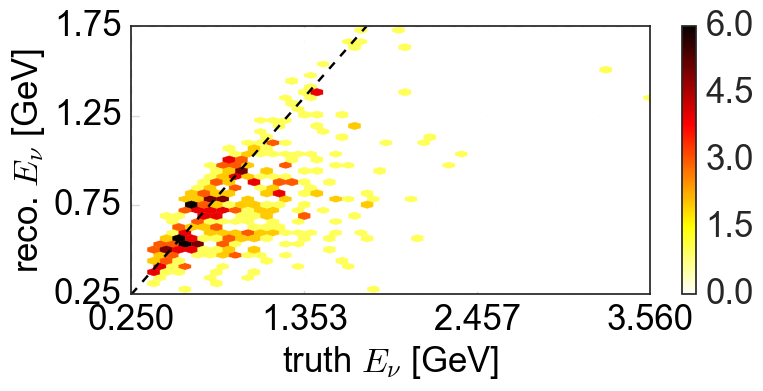

In [125]:
plot_truthEv_vs_recoEv(sample=reduced[0],figsuffix='sample3',do_add_diagonal_line=True,
                       gridsize=40,plottype='hexbin')